* The goal of clustering is to find a natural grouping in data so that items in the same cluster are more similar to each other than to those from different clusters.

* Clustering (or cluster analysis) is a technique that allows us to find groups of similar objects that are more related to each other than to objects in other groups.

* Prototype-based clustering means that each cluster is represented by a prototype, which is usually either the centroid (average) of similar points with continuous features, or the medoid (the most representative or the point that minimizes the distance to all other points that belong to a particular cluster) in the case of categorical features.


Although k-means clustering can be applied to data in higher dimensions, we will walk through the following examples using a simple two-dimensional dataset for the purpose of visualization:

Since clustering is an unsupervised method, we do not enjoy the luxury of ground-truth labels to evaluate the performance of a model. Thus, we used intrinsic performance metrics, such as the elbow method or silhouette analysis, as an attempt to quantify the quality of clustering.

Role-based access management (RBAC) is an important aspect of new hire onboarding, as it ensures that employees have the appropriate access to the systems, data, and resources they need to perform their job functions while maintaining security.

1. Identify Job Roles and Responsibilities
    - Before a new hire starts, work with the hiring manager and HR to clearly define the roles and responsibilities associated with the new position. Understand what systems, applications, and data the employee will need access to.
2. Create Role-Based Access Policies
    - Based on the identified roles and responsibilities, create RBAC policies that outline the specific access permissions for each role. Define what each role can access and what actions they can perform within systems and applications.
3. Map New Hires to Roles
    - When a new employee is hired, assign them to the appropriate role(s) based on their job function and responsibilities. This should be done as part of the onboarding process.
4. Access Provisioning
    - When a new employee is hired, assign them to the appropriate role(s) based on their job function and responsibilities. This should be done as part of the onboarding process.
5. Access Review and Approval
    - Implement an access review process to ensure that access is reviewed periodically. During this review, managers or administrators should verify that employees still require the access they have been granted. This helps prevent over-privileged accounts.
6. Monitoring and Audit
    - Continuously monitor access patterns and conduct regular access audits to identify any unauthorized access or policy violations. Address any issues promptly.
    
7. Feedback and Improvement
    - Collect feedback from employees and administrators about the effectiveness of RBAC policies. Use this feedback to continuously improve the RBAC process.

RBAC can help streamline the onboarding process by ensuring that new hires receive access to the resources they need quickly and efficiently, while also maintaining security and compliance. It's an essential component of overall access control and security within an organization.

### RBAC

To identify roles based on HR attributes and cluster employees into appropriate groups, you can use various machine learning algorithms for clustering and classification. Here are some commonly used algorithms for these tasks:

Clustering Algorithms:
K-Means Clustering:

K-Means is a popular clustering algorithm that partitions data into 'k' clusters based on similarity. It assigns each data point to the cluster with the nearest mean, making it suitable for grouping employees based on HR attributes.
Hierarchical Clustering:

Hierarchical clustering builds a tree of clusters, where the leaves represent individual data points and the branches represent the merging of clusters. It is useful when the number of clusters is not known beforehand and can provide insights into the hierarchical structure of employee groups.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

DBSCAN groups together data points that are close to each other and separates outliers. This algorithm is effective when the clusters have varying shapes and densities, making it suitable for HR attribute data that may exhibit different patterns.
Classification Algorithms:
Decision Trees:

Decision trees can be employed for classification tasks where the goal is to assign employees to specific roles based on HR attributes. Decision trees are interpretable and can capture complex decision-making processes.
Random Forest:

Random Forest is an ensemble learning method that consists of multiple decision trees. It can provide improved accuracy and generalization compared to a single decision tree, making it suitable for role assignment tasks.
Support Vector Machines (SVM):

SVM is a powerful algorithm for classification tasks. It works well for both linear and non-linear decision boundaries and can handle high-dimensional data. SVMs are effective when there is a clear separation between different roles based on HR attributes.
K-Nearest Neighbors (KNN):

KNN is a simple and intuitive algorithm that classifies data points based on the majority class among their nearest neighbors. It can be effective for role assignment when similar roles have similar HR attribute profiles.
Neural Networks:

Deep learning techniques, such as neural networks, can be employed for complex role assignment tasks. They can automatically learn hierarchical representations from HR attributes, but they may require more data and computational resources.
Unsupervised Learning (Combining Clustering and Classification):
Cluster-then-Classify Approach:

You can first use a clustering algorithm to group employees based on HR attributes and then apply a classification algorithm within each cluster to assign specific roles. This two-step approach can capture both global and local patterns in the data.
Gaussian Mixture Models (GMM):

GMM is a probabilistic model that can be used for both clustering and classification. It models data as a mixture of Gaussian distributions, allowing for flexible representation of clusters with varying shapes.
The choice of algorithm depends on the nature of your HR attribute data, the desired interpretability of the model, the size of your dataset, and other specific requirements of your role assignment task. It's often beneficial to experiment with multiple algorithms and evaluate their performance using metrics relevant to your business goals.

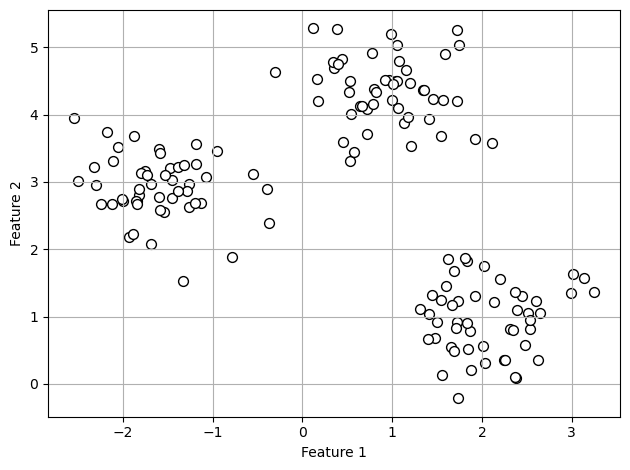

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

In [2]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

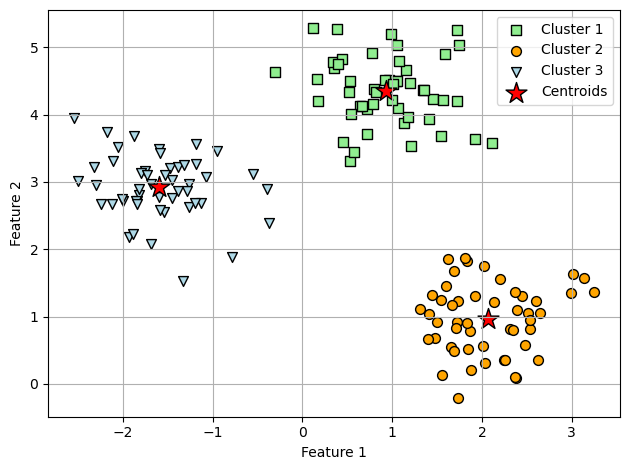

In [3]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


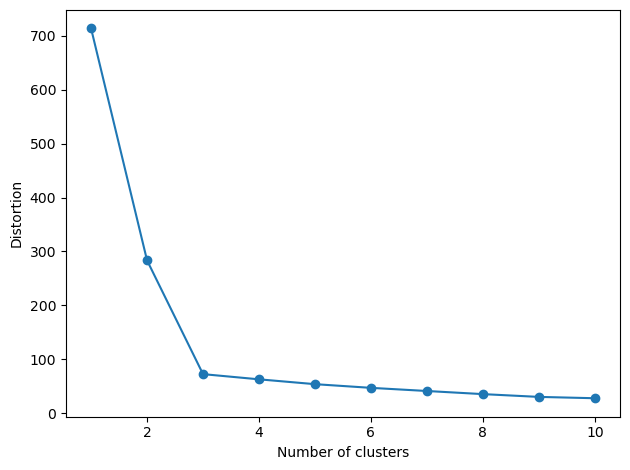

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

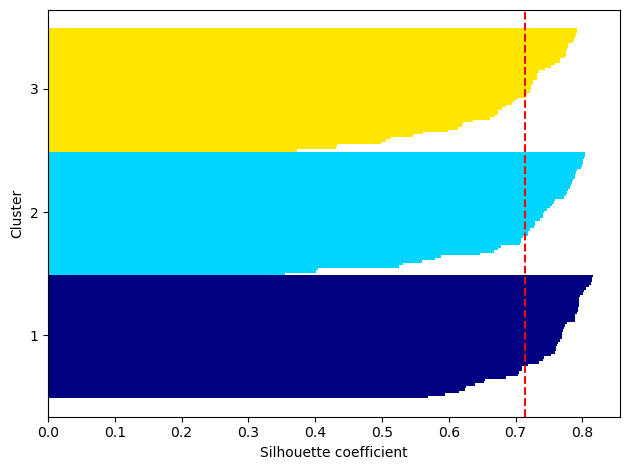

In [6]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    X, y_km, metric='euclidean'
)
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

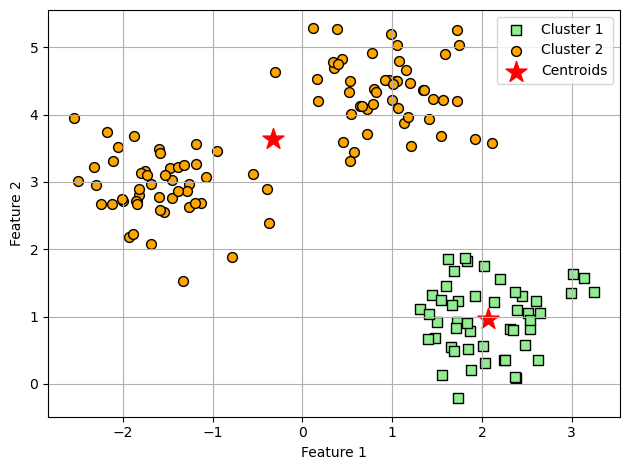

In [7]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

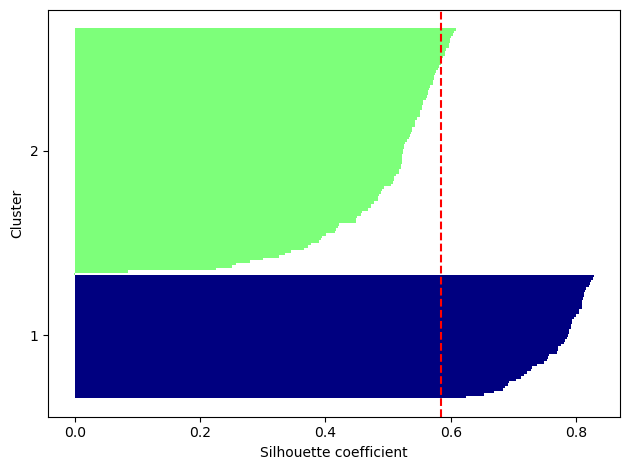

In [8]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    X, y_km, metric='euclidean'
)
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

## Organizing clusters as a hierarchical tree

In [9]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [10]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
                        pdist(df, metric='euclidean')),
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [11]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [13]:
row_clusters = linkage(df.values,
                       method='complete',
                       metric='euclidean')

In [15]:
pd.DataFrame(row_clusters,
             columns=['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
             index=[f'cluster {(i + 1)}' for i in
                    range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


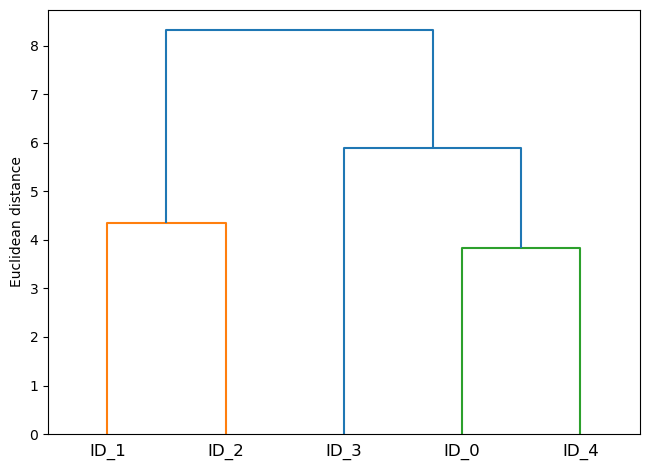

In [14]:
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(
    row_clusters,
    labels=labels,
    # make dendrogram black (part 2/2)
    # color_threshold=np.inf
)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_39694/2099977832.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_39694/2099977832.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


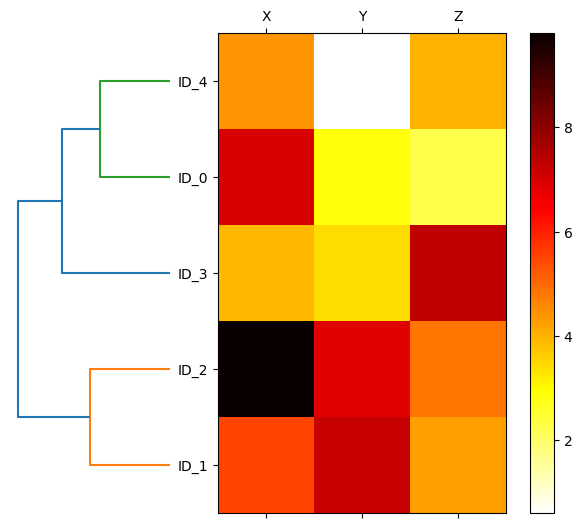

In [16]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,
                       orientation='left')
# note: for matplotlib < v1.5.1, please use
# orientation='right'

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                  interpolation='nearest',
                  cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')
# Cluster labels: [1 0 0 2 1]

Cluster labels: [1 0 0 2 1]


/Users/leiyu/opt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')
# Cluster labels: [0 1 1 0 0]

Cluster labels: [0 1 1 0 0]


/Users/leiyu/opt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Locating regions of high density via DBSCAN

density-based spatial clustering of applications with noise (DBSCAN)

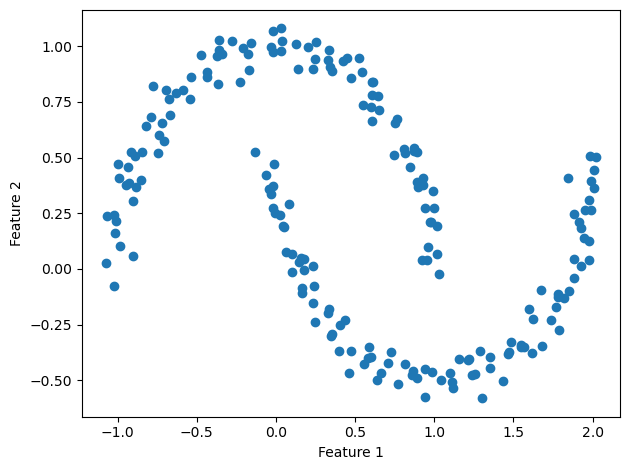

In [19]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

/Users/leiyu/opt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leiyu/opt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


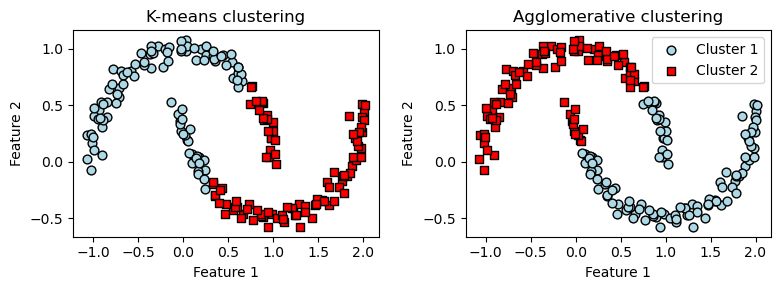

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2,
            random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

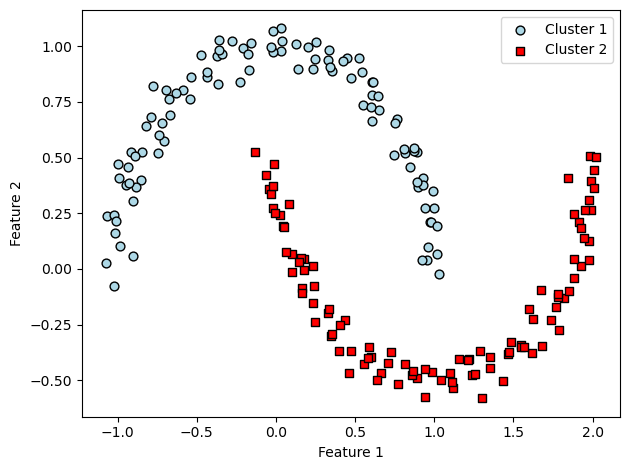

In [21]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

So far, we have seen three of the most fundamental categories of clustering algorithms: prototype-based clustering with k-means, agglomerative hierarchical clustering, and density-based clustering via DBSCAN. However, there is also a fourth class of more advanced clustering algorithms that we have not covered in this chapter: graph-based clustering. Probably the most prominent members of the graph-based clustering family are the spectral clustering algorithms.

Note that, in practice, it is not always obvious which clustering algorithm will perform best on a given dataset, especially if the data comes in multiple dimensions that make it hard or impossible to visualize. Furthermore, it is important to emphasize that a successful clustering does not only depend on the algorithm and its hyperparameters; rather, the choice of an appropriate distance metric and the use of domain knowledge that can help to guide the experimental setup can be even more important.

In the context of the curse of dimensionality, it is thus common practice to apply dimensionality reduction techniques prior to performing clustering. Such dimensionality reduction techniques for unsupervised datasets include principal component analysis and t-SNE, which we covered in Chapter 5, Compressing Data via Dimensionality Reduction. Also, it is particularly common to compress datasets down to two-dimensional subspaces, which allows us to visualize the clusters and assigned labels using two-dimensional scatterplots, which are particularly helpful for evaluating the results.

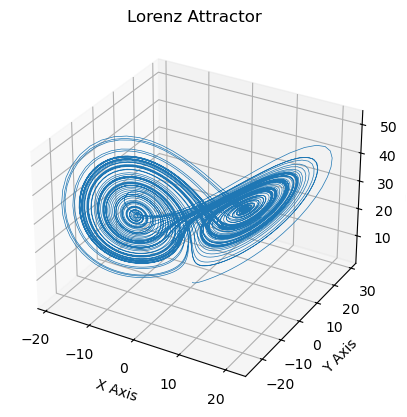

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [4]:
import itertools

def get_combinations(input_list):
    # Generate all combinations of items in the list
    all_combinations = []
    for r in range(1, len(input_list) + 1):
        combinations = itertools.combinations(input_list, r)
        all_combinations.extend(combinations)
    
    # Convert tuples to lists
    all_combinations = [list(combination) for combination in all_combinations]
    
    return all_combinations

# Example list
input_list = ['A', 'B', 'C']

# Get all combinations
combinations = get_combinations(input_list)
print(combinations)
# Output the list of items for each combination
for combination in combinations:
    print(combination)


[['A'], ['B'], ['C'], ['A', 'B'], ['A', 'C'], ['B', 'C'], ['A', 'B', 'C']]
['A']
['B']
['C']
['A', 'B']
['A', 'C']
['B', 'C']
['A', 'B', 'C']


In [33]:
import itertools
import time

start = time.time()
print(time.time()-start)

# def calculate_all_combinations(elements):
#     return itertools.chain.from_iterable(
#         itertools.combinations(elements, r)
#         for r in range(1, len(elements) + 1)
#     )

def calculate_all_combinations(elements):
    for r in range(1, len(elements) + 1):
        for combination in itertools.combinations(elements, r):
            yield combination

# Example usage:
# elements = ['A', 'B', 'C']
elements = [0, 1, 2]
all_combinations = calculate_all_combinations(elements)
print("All combinations:")
print(all_combinations)
for combination in all_combinations:
    print(combination)

9.107589721679688e-05
All combinations:
<generator object calculate_all_combinations at 0x7f7ddbcf5770>
(0,)
(1,)
(2,)
(0, 1)
(0, 2)
(1, 2)
(0, 1, 2)


In [45]:
n = 10
input_list = [i for i in range(0, n)]
print(input_list)

start = time.time()
# all_combinations = calculate_all_combinations(input_list)
all_combinations = generate_all_combinations(input_list)
# print(type(all_combinations))
# print(len(all_combinations))
len_com = sum(1 for _ in all_combinations)
print(f'Number of combinations is {len_com}')
print(time.time()-start)

for combination in all_combinations:
    # print(combination, list(combination))
    print(combination)

# start = time.time()
# combinations = get_combinations(input_list)
# # print(len(combinations))
# print(time.time()-start)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Number of combinations is 10
0.00032782554626464844


In [79]:
n = 30
input_l = []
time_l = []
avg_l = []

for j in range(1, n):
    input_l.append(j)
    input_list = [i for i in range(0, j)]
    print(input_list)
    start = time.time()
    # all_combinations = generate_all_combinations(input_list)
    all_combinations = calculate_all_combinations(input_list)
    len_com = sum(1 for _ in all_combinations)
    time_l.append((time.time()-start)/3600)
    avg_l.append(time_l[-1]/len_com)
    print(f'Number of combinations is {len_com}, Time {time_l[-1]}')

time_l, input_l, avg_l

[0]
Number of combinations is 1, Time 6.6889656914605035e-09
[0, 1]
Number of combinations is 3, Time 1.3907750447591146e-09
[0, 1, 2]
Number of combinations is 7, Time 1.0596381293402778e-09
[0, 1, 2, 3]
Number of combinations is 15, Time 1.7219119601779513e-09
[0, 1, 2, 3, 4]
Number of combinations is 31, Time 2.185503641764323e-09
[0, 1, 2, 3, 4, 5]
Number of combinations is 63, Time 3.907415601942275e-09
[0, 1, 2, 3, 4, 5, 6]
Number of combinations is 127, Time 6.424056159125434e-09
[0, 1, 2, 3, 4, 5, 6, 7]
Number of combinations is 255, Time 1.1722246805826822e-08
[0, 1, 2, 3, 4, 5, 6, 7, 8]
Number of combinations is 511, Time 2.1391444736056856e-08
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Number of combinations is 1023, Time 4.245175255669488e-08
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Number of combinations is 2047, Time 8.232063717312283e-08
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Number of combinations is 4095, Time 1.6384654574924044e-07
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Number of c

([6.6889656914605035e-09,
  1.3907750447591146e-09,
  1.0596381293402778e-09,
  1.7219119601779513e-09,
  2.185503641764323e-09,
  3.907415601942275e-09,
  6.424056159125434e-09,
  1.1722246805826822e-08,
  2.1391444736056856e-08,
  4.245175255669488e-08,
  8.232063717312283e-08,
  1.6384654574924044e-07,
  3.1557348039415147e-07,
  5.874368879530165e-07,
  1.2647443347507052e-06,
  2.1708673901028102e-06,
  4.072454240587022e-06,
  7.2656075159708656e-06,
  1.431723435719808e-05,
  2.6675595177544488e-05,
  5.4592291514078774e-05,
  0.00010932167371114094,
  0.0002226200368669298,
  0.0004418708880742391,
  0.0008829916185802884,
  0.0017771742078993055,
  0.0035880452394485476,
  0.007219611671235826,
  0.0146249830060535],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [6.6889656914605035e-09,
  4.6359168158637157e-10,
  1.5137687562003968e-10,
  1.1479413067853008

In [76]:
import math

def calculate_combinations(n, r):
    return math.factorial(n) / (math.factorial(r) * math.factorial(n - r))

# Example usage:
n = 1000  # Total number of elements
# r = 3  # Number of elements to choose (taken at a time)
# num_combinations = calculate_combinations(n, r)
# print("Number of combinations:", num_combinations)

count = 0
for i in range(0, n):
    count = count + calculate_combinations(n, i)
print(count, count/536870911*0.884177279472351/60/24/365)

1.0715086071862673e+301 3.3574517854502087e+286


In [19]:
def generate_all_combinations(elements):
    count = 0
    exceeded_limit = False
    for r in range(1, len(elements) + 1):
        for combination in itertools.combinations(elements, r):
            if not exceeded_limit:
                count += 1
                if count > 10:
                    exceeded_limit = True
            if not exceeded_limit:
                yield combination

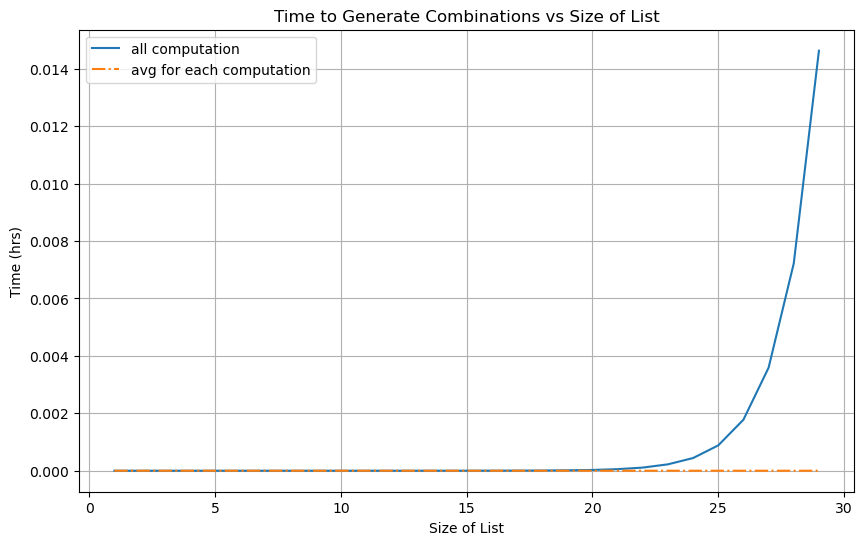

In [84]:
# Plot the figure
plt.figure(figsize=(10, 6))
# plt.plot(input_l, time_l, marker='o', linestyle='-')
plt.plot(input_l, time_l, linestyle='-', label='all computation')
plt.plot(input_l, avg_l, linestyle='-.', label='avg for each computation')
plt.xlabel('Size of List')
plt.ylabel('Time (hrs)')
plt.title('Time to Generate Combinations vs Size of List')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Example usage:
n = 1000  # Total number of elements
# r = 3  # Number of elements to choose (taken at a time)
# num_combinations = calculate_combinations(n, r)
# print("Number of combinations:", num_combinations)

count = 0
for i in range(0, n):
    count = count + calculate_combinations(n, i)
print(count, count/536870911*0.884177279472351/60/24/365)

n = 40
input_l = []
time_l = []
avg_l = []
com_l = []

for j in range(1, n):
    input_l.append(j)
    input_list = [i for i in range(0, j)]
    # print(input_list)
    start = time.time()
    # all_combinations = generate_all_combinations(input_list)
    if j<20:
        all_combinations = calculate_all_combinations(input_list)
        len_com = sum(1 for _ in all_combinations)
        time_l.append((time.time()-start)/3600)
    else:
        len_com = 0
        for i in range(0, j):
            len_com = len_com + calculate_combinations(j, i)
        time_l.append(len_com/536870911*0.884177279472351/60)
    
    avg_l.append(time_l[-1]/len_com)
    com_l.append(len_com)
    # print(f'Number of combinations is {len_com}, Time {time_l[-1]}')

time_l, input_l, avg_l, com_l

1.0715086071862673e+301 3.3574517854502087e+286


([2.4504131740993924e-09,
  8.609559800889757e-10,
  5.298190646701389e-10,
  1.1258655124240452e-09,
  1.3245476616753473e-09,
  2.3179584079318577e-09,
  3.907415601942275e-09,
  7.54992167154948e-09,
  1.3709068298339844e-08,
  2.7219454447428385e-08,
  5.622704823811849e-08,
  1.0556644863552517e-07,
  2.016623814900716e-07,
  4.0451685587565107e-07,
  8.802943759494357e-07,
  1.674162016974555e-06,
  3.378325038486057e-06,
  6.692210833231608e-06,
  1.3374222649468316e-05,
  2.8781785087958837e-05,
  5.7563597624393065e-05,
  0.00011512722269726152,
  0.00023025447284299845,
  0.0004605089731344723,
  0.0009210179737174201,
  0.0018420359748833155,
  0.003684071977215106,
  0.0073681439818786875,
  0.01473628799120585,
  0.02947257600986018,
  0.05894515204716883,
  0.11789030412178612,
  0.23578060827102074,
  0.47156121656948996,
  0.9431224331664283,
  1.886244866360305,
  3.772489732748059,
  7.544979465523566,
  15.089958931074582],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9

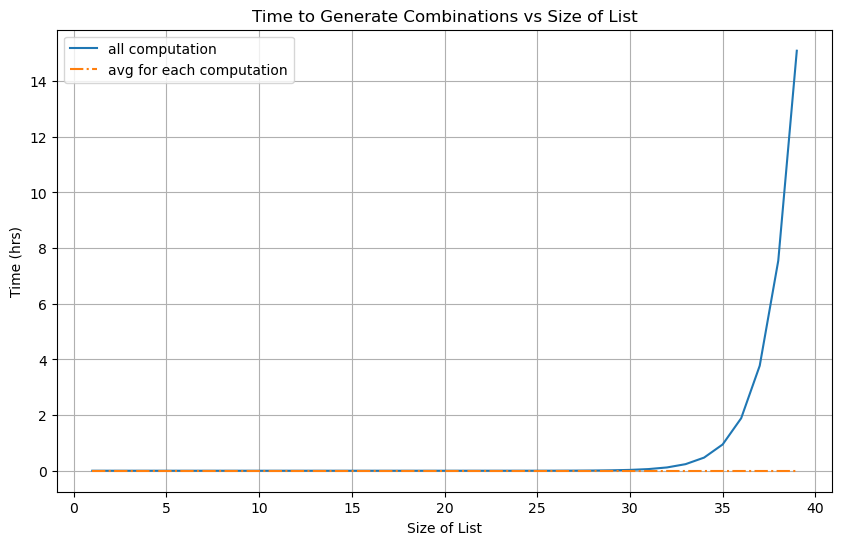

In [98]:
# Plot the figure
plt.figure(figsize=(10, 6))
# plt.plot(input_l, time_l, marker='o', linestyle='-')
plt.plot(input_l, time_l, linestyle='-', label='all computation')
plt.plot(input_l, avg_l, linestyle='-.', label='avg for each computation')
plt.xlabel('Size of List')
plt.ylabel('Time (hrs)')
plt.title('Time to Generate Combinations vs Size of List')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import boto3

# Create an STS client
sts_client = boto3.client('sts')

# Assume the IAM role
response = sts_client.assume_role(
    RoleArn='arn:aws:iam::ACCOUNT_ID:role/ROLE_NAME',  # Replace with the ARN of the IAM role
    RoleSessionName='S3BucketListSession'
)

# Extract temporary credentials from the response
credentials = response['Credentials']

# Create an S3 client using the assumed role's credentials
s3_client = boto3.client(
    's3',
    aws_access_key_id=credentials['AccessKeyId'],
    aws_secret_access_key=credentials['SecretAccessKey'],
    aws_session_token=credentials['SessionToken']
)

# List S3 buckets
response = s3_client.list_buckets()

# Extract bucket names from the response
bucket_names = [bucket['Name'] for bucket in response['Buckets']]

# Print the bucket names
print("List of S3 buckets accessible by the assumed role:")
for bucket_name in bucket_names:
    print(bucket_name)

In [ ]:
import boto3

# Create an S3 client
s3_client = boto3.client('s3')

# List all S3 buckets
response = s3_client.list_buckets()

# Extract bucket names from the response
bucket_names = [bucket['Name'] for bucket in response['Buckets']]

# Print the bucket names
print("List of S3 buckets:")
for bucket_name in bucket_names:
    print(bucket_name)


In [ ]:
import pyarrow.parquet as pq
import s3fs

# Create an S3 filesystem object
s3 = s3fs.S3FileSystem()

# Specify the S3 bucket and Parquet file path
bucket_name = 'your-bucket-name'
file_path = 'your/path/to/your_file.parquet'

# Open the Parquet file using pyarrow
with s3.open(f's3://{bucket_name}/{file_path}', 'rb') as f:
    # Read the Parquet file into a pyarrow Table
    table = pq.read_table(f)

# Convert the table to a pandas DataFrame if needed
df = table.to_pandas()

# Now you can work with the DataFrame
print(df.head())


In [104]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample HR data
data = {
    'Location': ['New York', 'Los Angeles', 'Chicago', 'New York'],
    'JobCode': ['JC001', 'JC002', 'JC003', 'JC001'],
    'JobFunction': ['Engineering', 'Sales', 'Engineering', 'Engineering'],
    'Title': ['Engineer', 'Sales Manager', 'Engineer', 'Senior Engineer']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# One-hot encode categorical attributes
encoded_data = pd.get_dummies(df)

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

# Choose the number of clusters (e.g., 3 clusters)
n_clusters = 3

# Build K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print the DataFrame with cluster assignments
print(df)


      Location JobCode  JobFunction            Title  Cluster
0     New York   JC001  Engineering         Engineer        1
1  Los Angeles   JC002        Sales    Sales Manager        2
2      Chicago   JC003  Engineering         Engineer        0
3     New York   JC001  Engineering  Senior Engineer        1


/Users/leiyu/opt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [105]:
encoded_data

,Location_Chicago,Location_Los Angeles,Location_New York,JobCode_JC001,JobCode_JC002,JobCode_JC003,JobFunction_Engineering,JobFunction_Sales,Title_Engineer,Title_Sales Manager,Title_Senior Engineer
0,0,0,1,1,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,1,0,1,0
2,1,0,0,0,0,1,1,0,1,0,0
3,0,0,1,1,0,0,1,0,0,0,1


In [106]:
scaled_data

array([[-0.57735027, -0.57735027,  1.        ,  1.        , -0.57735027,
        -0.57735027,  0.57735027, -0.57735027,  1.        , -0.57735027,
        -0.57735027],
       [-0.57735027,  1.73205081, -1.        , -1.        ,  1.73205081,
        -0.57735027, -1.73205081,  1.73205081, -1.        ,  1.73205081,
        -0.57735027],
       [ 1.73205081, -0.57735027, -1.        , -1.        , -0.57735027,
         1.73205081,  0.57735027, -0.57735027,  1.        , -0.57735027,
        -0.57735027],
       [-0.57735027, -0.57735027,  1.        ,  1.        , -0.57735027,
        -0.57735027,  0.57735027, -0.57735027, -1.        , -0.57735027,
         1.73205081]])

In [107]:
from sklearn.preprocessing import StandardScaler

# Sample data
data = [[1, 2], [3, 4], [5, 6]]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(data)

print("Original data:")
print(data)
print("\nScaled data:")
print(scaled_data)


Original data:
[[1, 2], [3, 4], [5, 6]]

Scaled data:
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [109]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Sample data
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])

# Define the grouping constraint (e.g., based on distance)
grouping_constraint = [[0, 1, 2], [3, 4, 5]]  # Points 0, 1, 2 are grouped together, points 3, 4, 5 are grouped together

# Initialize and fit the clustering model
model = AgglomerativeClustering(n_clusters=len(grouping_constraint), linkage='complete')
model.fit(X)

# Get cluster labels
cluster_labels = model.labels_

# Check if the grouping constraint is satisfied
for group in grouping_constraint:
    if len(set(cluster_labels[group])) != 1:
        print("Grouping constraint is not satisfied.")
        break
else:
    print("Grouping constraint is satisfied.")


Grouping constraint is not satisfied.


/Users/leiyu/opt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


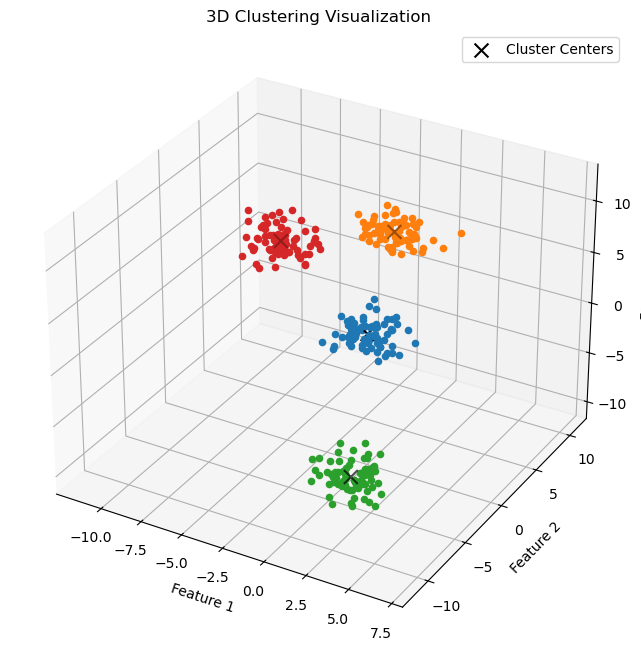

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data (3 features)
X, _ = make_blobs(n_samples=300, centers=4, n_features=3, random_state=42)

# Fit K-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each data point with its assigned cluster color
for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c='C'+str(labels[i]), marker='o')

# Plot cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', marker='x', s=100, label='Cluster Centers')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Clustering Visualization')
ax.legend()
plt.show()


Centroid: [4. 5. 6.]


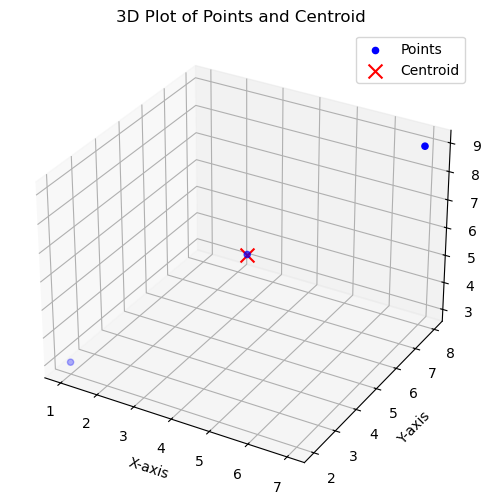

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_centroid(points):
    """
    Calculate the centroid of a group of points in 3D space.
    
    Args:
    - points (numpy.ndarray): Array of shape (N, 3) representing N points in 3D space.
    
    Returns:
    - numpy.ndarray: Array of shape (3,) representing the centroid coordinates (x, y, z).
    """
    return np.mean(points, axis=0)

# Example usage:
group_of_points = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Calculate centroid
centroid = calculate_centroid(group_of_points)
print("Centroid:", centroid)

# Plot the points and centroid in 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(group_of_points[:,0], group_of_points[:,1], group_of_points[:,2], c='b', label='Points')

# Plot the centroid
ax.scatter(centroid[0], centroid[1], centroid[2], c='r', marker='x', s=100, label='Centroid')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Plot of Points and Centroid')
ax.legend()

# Show plot
plt.show()

Centroid: [ 0.27573452  0.19587156 -0.24160419]


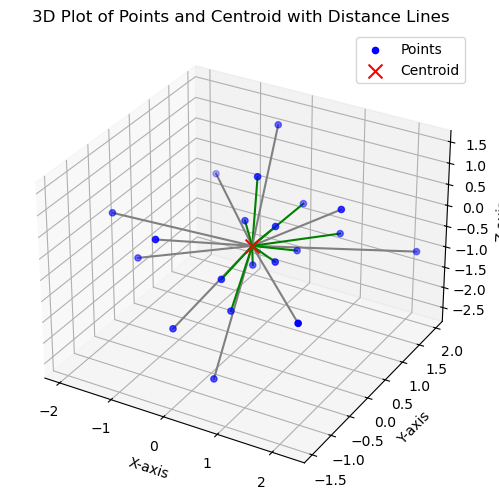

Top 10 Distances:
Distance from point 19 to centroid: 0.49
Distance from point 11 to centroid: 0.68
Distance from point 3 to centroid: 0.77
Distance from point 20 to centroid: 0.84
Distance from point 5 to centroid: 0.84
Distance from point 8 to centroid: 0.92
Distance from point 18 to centroid: 1.18
Distance from point 6 to centroid: 1.30
Distance from point 13 to centroid: 1.39
Distance from point 4 to centroid: 1.70


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random sample data with 20 points
np.random.seed(0)  # For reproducibility
num_points = 20
group_of_points = np.random.normal(0, 1, size=(num_points, 3))

# Calculate centroid of the group
centroid = np.mean(group_of_points, axis=0)
print("Centroid:", centroid)

# Calculate distances
distances = []
for point in group_of_points:
    # Calculate distance between point and centroid
    distance = np.linalg.norm(point - centroid)
    distances.append(distance)

# Find indices of top 10 shortest distances
top_10_indices = np.argsort(distances)[:10]

# Plot 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(group_of_points[:,0], group_of_points[:,1], group_of_points[:,2], c='b', label='Points')

# Plot centroid
ax.scatter(centroid[0], centroid[1], centroid[2], c='r', marker='x', s=100, label='Centroid')

# Draw lines from points to centroid
for i, point in enumerate(group_of_points):
    if i in top_10_indices:
        color = 'green'  # Color for top 10 distances
    else:
        color = 'gray'
    ax.plot([point[0], centroid[0]], [point[1], centroid[1]], [point[2], centroid[2]], color=color)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Plot of Points and Centroid with Distance Lines')
ax.legend()

# Show plot
plt.show()

# List top 10 distances
print("Top 10 Distances:")
for i in top_10_indices:
    print(f"Distance from point {i+1} to centroid: {distances[i]:.2f}")


In [11]:
import pandas as pd

# Sample DataFrame
data = {'Column1': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
        'Column2': ['X', 'Y', 'Y', 'X', 'Z', 'Y', 'X']}
df = pd.DataFrame(data)

# Count the occurrences of each unique combination of values in Column1 and Column2
combination_counts = df.groupby(['Column1', 'Column2']).size().reset_index(name='Count')

# Print the result
print(combination_counts)


  Column1 Column2  Count
0       A       X      2
1       A       Y      1
2       B       Y      1
3       B       Z      1
4       C       X      1
5       C       Y      1


[[4, 3, 2, 1], [6, 2, 1, 1], [5, 1, 1, 1, 1, 1], [5, 3, 2]]
[4, 3, 2, 1]
0.0
0.25
0.5
0.75
[6, 2, 1, 1]
0.0
0.16666666666666666
0.3333333333333333
0.5
[5, 1, 1, 1, 1, 1]
0.0
0.2
0.4
0.6
0.8
1.0
[5, 3, 2]
0.0
0.2
0.4


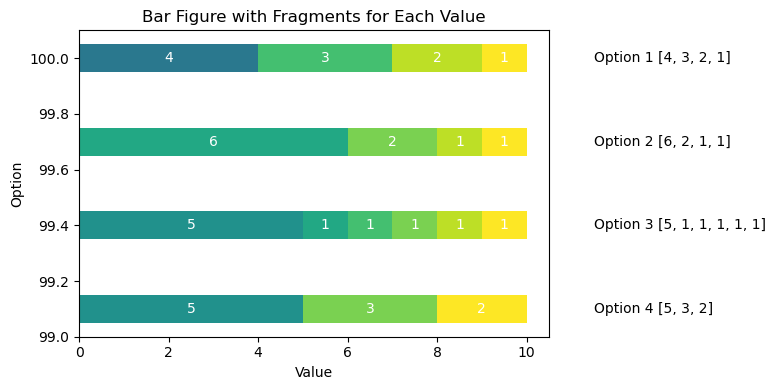

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Counts
# count = [1, 2, 3, 4]
counts = [[1, 2, 3, 4],[1, 2, 3, 4], [4, 3, 2, 1], [1,3,2,4], [1,1,2,6], [1,1,1,1,1,5], [2,3,5]]


def check_list(l1, l2):
    l1.sort(reverse=True)
    l2.sort(reverse=True)
    if l1 == l2:
        return True
    return False

def clean_list(list):
    res = []
    for l in list:
        l.sort(reverse=True)
        if l not in res:
            res.append(l)
    return res

print(clean_list(counts))

counts = clean_list(counts)

# Plot bar figure
plt.figure(figsize=(8, 4))

# Plot each value as a separate fragment with different size and color

y = 100
h = 0.1
opt = 1
max_x = max(sum(count) for count in counts)

for count in counts:
    bottom = 0
    col = 0
    print(count)
    for idx, c in enumerate(count):
        # plt.barh(y, c, left=bottom, color=plt.cm.viridis(idx/max(count)), alpha=c/max(count), height=h)  # Adjust the color and size of each fragment
        col += c/sum(count)
        plt.barh(y, c, left=bottom, color=plt.cm.viridis(col), height=h)  # Adjust the color and size of each fragment
        bottom += c
        print(idx/max(count))
        # Calculate the x-position of the text to be in the middle of each fragment
        text_x = bottom - c / 2
        plt.text(text_x, y, str(c), color='white', fontsize=10, ha='center', va='center')  # Annotate the size of each fragment
    # plt.text(bottom + 1, y, 'Option ' + str(opt) + ' ' + str(count), verticalalignment='center')  # Annotate the plot with the list
    plt.text(max_x*115/100, y, 'Option ' + str(opt) + ' ' + str(count), verticalalignment='center')  # Annotate the plot with the list
    opt += 1
    y -= 0.3

plt.ylabel('Option')
plt.xlabel('Value')
plt.title('Bar Figure with Fragments for Each Value')
# plt.xticks(np.arange(1, sum(count) + 1))  # Set the tick positions
plt.xlim(0, max_x*105/100)  # Set the x-axis limits to make the figure fit
plt.tight_layout()
plt.show()